#**Summer Olympics Data Analysis Assignment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("summer.csv")

In [63]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


###**1. In how many cities Summer Olympics is held so far?**

In [64]:
l=len(df["City"].unique())
print("No.of cities Summer Olympics is held so far is",l)

No.of cities Summer Olympics is held so far is 22


###**2. Which sport is having most number of Gold Medals so far? (Top 5)**

         Sport  gold
0     Aquatics  4170
1    Athletics  3638
17      Rowing  2667
4   Gymnastics  2307
3      Fencing  1613


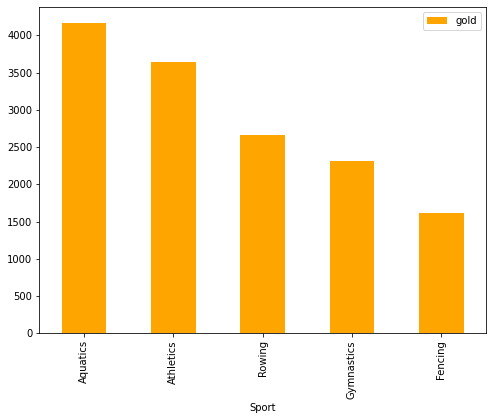

In [65]:
data = []

for Sport in df['Sport'].unique():
    data.append([Sport , len(df[df['Sport']  == Sport])])

gold=df[df['Medal']=='Gold']
gold['Sport'].value_counts()

s=pd.DataFrame(data,columns = ['Sport','gold']).sort_values(by='gold', ascending=False).head()
print(s)
s.plot(x = 'Sport', y = 'gold', kind = 'bar', figsize = (8,6),color = 'orange')


###**3. Which sport is having most number of medals so far? (Top 5)**

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64


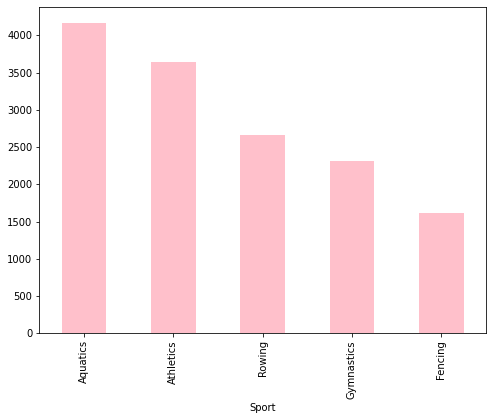

In [66]:
s=df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
print(s)
s.plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (8,6),color='pink')

###**4. Which player has won most number of medals? (Top 5)**

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64


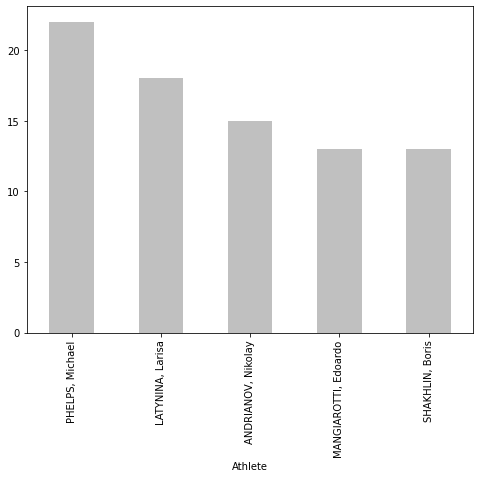

In [67]:
plt.figure(figsize=(8,6))
s=df.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()
print(s)
s.plot.bar(color='silver')
plt.show()

###**5. Which player has won most number Gold Medals of medals? (Top 5)**

Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


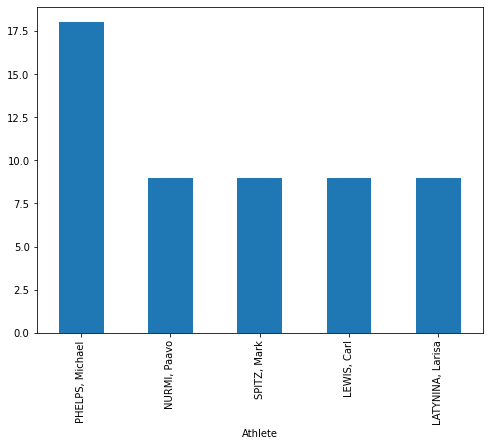

In [ ]:
plt.figure(figsize=(8,6))
gold= df[df['Medal'] == 'Gold']
athlete = gold.groupby('Athlete').count()['Medal']
s = athlete.sort_values(ascending = False).head()
print(s)
s.plot.bar()
plt.show()

###**6. In which year India won first Gold Medal in Summer Olympics?**

#####***ANSWER: In  1928 India won first Gold Medal in Summer Olympics***

In [68]:
India=df[df['Country']=='IND']
gold = df[df['Medal'] == 'Gold']
medals=India.groupby('Year')['Medal'].unique()
yr = gold[gold['Country'] =='IND']['Year'].min()
print(medals)
print("\n****************India won first Gold Medal in", yr ,"****************")

Year
1900            [Silver]
1928              [Gold]
1932              [Gold]
1936              [Gold]
1948              [Gold]
1952      [Gold, Bronze]
1956              [Gold]
1960            [Silver]
1964              [Gold]
1968            [Bronze]
1972            [Bronze]
1980              [Gold]
1996            [Bronze]
2000            [Bronze]
2004            [Silver]
2008      [Bronze, Gold]
2012    [Bronze, Silver]
Name: Medal, dtype: object

****************India won first Gold Medal in 1928 ****************


###**7. Which event is most popular in terms on number of players? (Top 5)**

                event  Athlete
80           Football     1497
176            Hockey     1422
138  Team Competition     1147
327        Basketball     1012
337          Handball      973


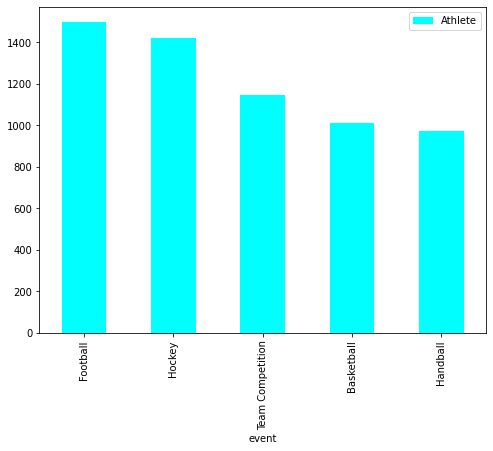

In [69]:
A = []

for event in df['Event'].unique():
    A.append([event , len(df[df['Event']  == event])])

for Athlete in df['Athlete'].unique():
   A.append([Athlete , len(df[df['Athlete']  == Athlete])])

s=pd.DataFrame(A,columns = ['event','Athlete']).sort_values(by='Athlete', ascending=False).head()
print(s)
s.plot(x = 'event', y = 'Athlete', kind = 'bar', figsize = (8,6),color='aqua')  

###**8. Which sport is having most female Gold Medalists? (Top 5)**

Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64


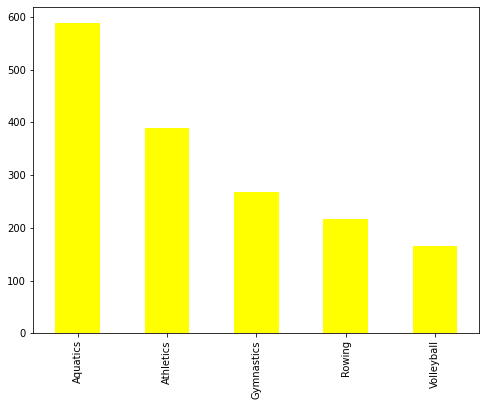

In [71]:
gen=df[df['Gender']=='Women']
sports_medals=gen.query('Medal=="Gold"')['Sport'].value_counts().sort_values(ascending = False).head()
print(sports_medals)
sports_medals.plot(kind = 'bar', figsize = (8,6),color='yellow')
